In [1]:
# import statements
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import pandas as pd
from scipy import stats
import seaborn as sns
from mpl_toolkits import mplot3d
import importlib
importlib.import_module('mpl_toolkits.mplot3d').__path__
import matplotlib.pyplot as plt
import time

In [2]:
df_train=pd.read_csv('partCleaned.csv')

In [3]:
df_tr=df_train

In [4]:
clmns = ['AvMoisture%', 'AvN%(dry)','AvP%(dry)', 'AvK%(dry)']

In [5]:
df_tr_std = stats.zscore(df_tr[clmns])
listOutput=[]

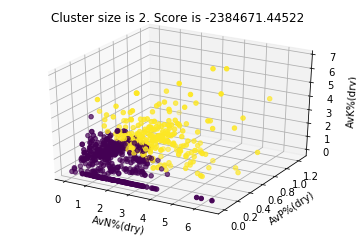

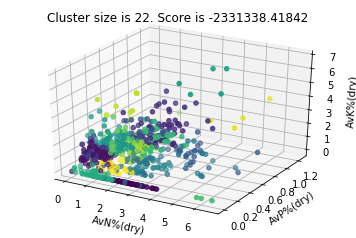

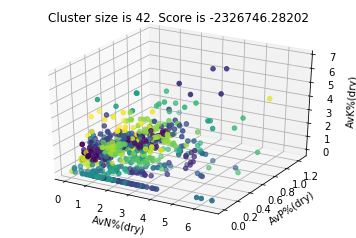

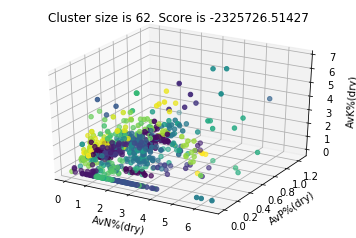

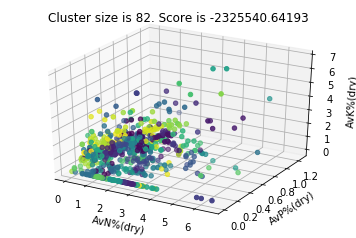

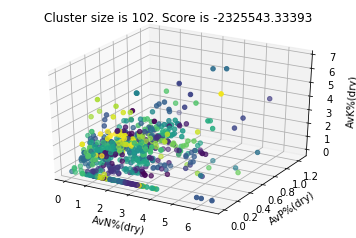

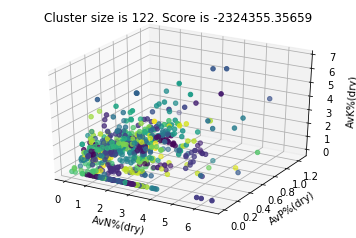

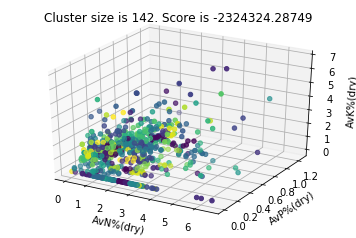

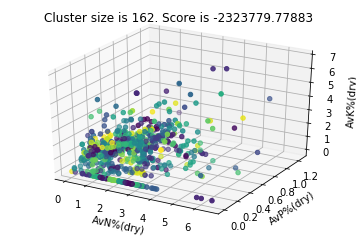

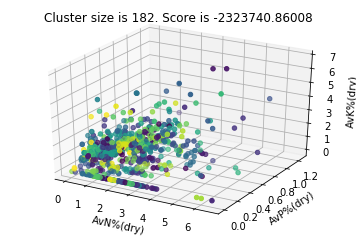

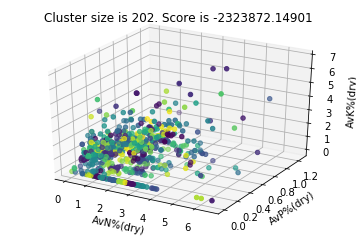

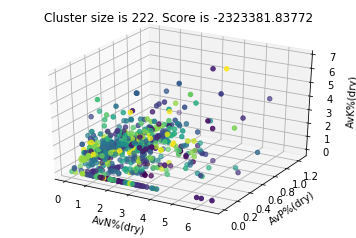

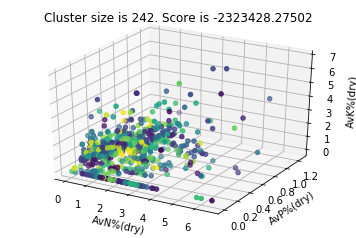

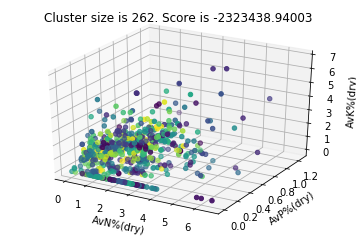

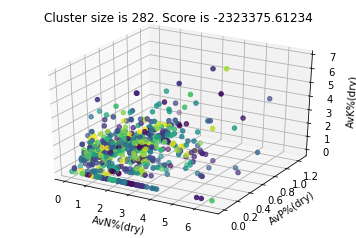

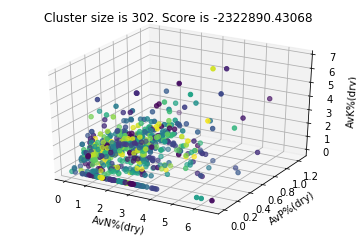

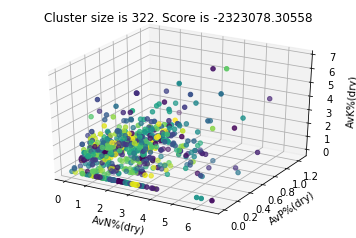

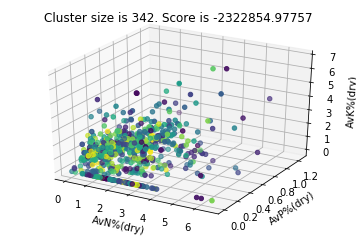

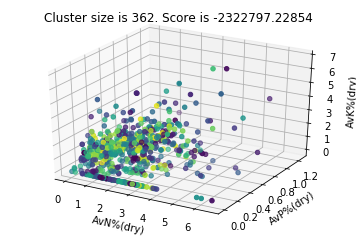

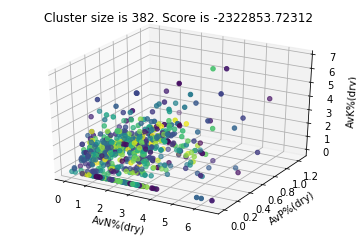

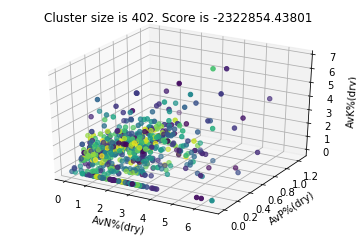

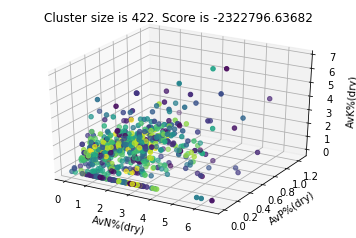

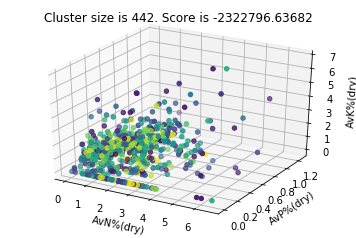

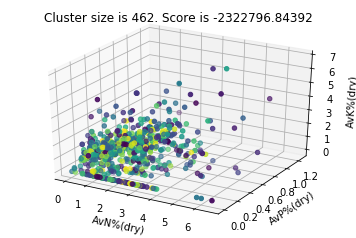

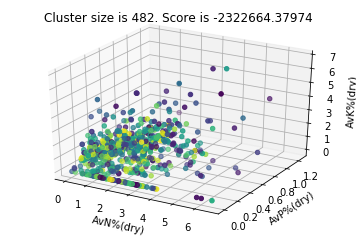

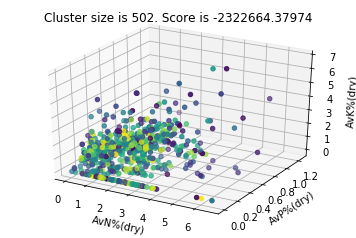

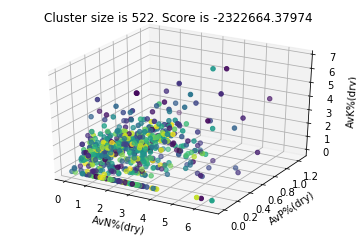

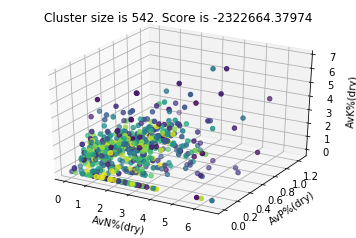

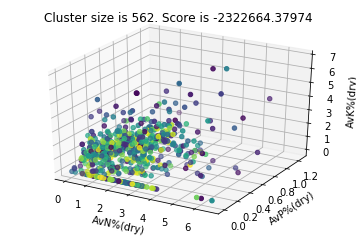

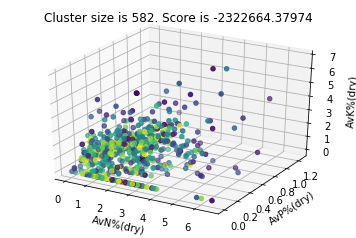

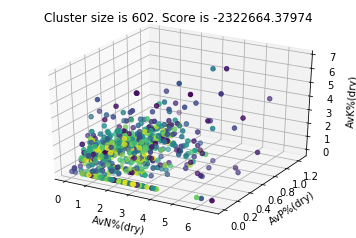

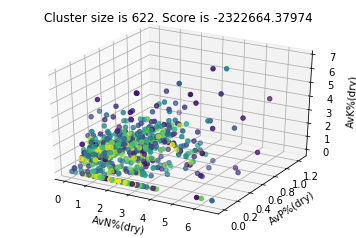

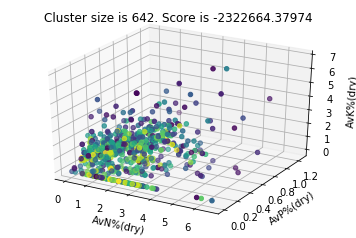

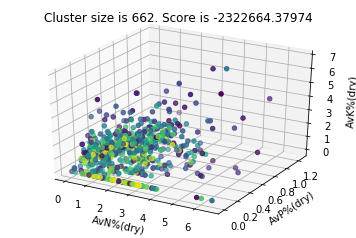

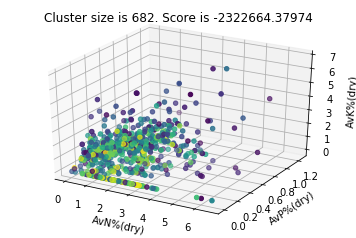

In [6]:
for i in range(2,700,+20):
    kmeans = KMeans(n_clusters=i, random_state=0).fit(df_tr_std)
    labels = kmeans.labels_
    df_tr['clusters'] = labels
    clmns.extend(['clusters'])
    df_clust=df_tr[clmns]
    df_test=df_tr[['AvMoisture%', 'AvN%(dry)', 'AvP%(dry)', 'AvK%(dry)']]
    #listOutput.append(kmeans.score(df_test.values))
    fig=plt.figure()
    ax = fig.add_subplot(111,projection='3d')
    ax.scatter(df_tr['AvN%(dry)'],df_tr['AvP%(dry)'],df_tr['AvK%(dry)'],c=labels,marker='o');
    ax.set_title("Cluster size is "+str(i)+". Score is "+str(kmeans.score(df_test.values)))
    ax.set_xlabel('AvN%(dry)')
    ax.set_ylabel('AvP%(dry)')
    ax.set_zlabel('AvK%(dry)')
    plt.show()

In [8]:
listOutput

[-2325413.1103692232]

In [11]:

    
#print (df_tr[clmns].groupby(['clusters']).mean())
#df_tr=df_tr[clmns].groupby(['clusters']).mean()
#df_clust

In [13]:
fig=plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.scatter(df_tr['AvN%(dry)'],df_tr['AvP%(dry)'],df_tr['AvK%(dry)'],c='y',marker='o');
ax.set_xlabel('AvN%(dry)')
ax.set_ylabel('AvP%(dry)')
ax.set_zlabel('AvK%(dry)')
plt.show()

In [10]:
 from scipy import sparse
 values=np.array([['12.615607','1.028399','0.070979','0.553241']])#,['0.4','0.5','0.6','0.6']])
 print(values)
 #m[inds,np.arange(mshape[1])]=values


[['12.615607' '1.028399' '0.070979' '0.553241']]


In [12]:
prediction=kmeans.predict(values)
prediction

array([148])

In [13]:
df_tr['Crop'].loc[df_tr['clusters'] == prediction[0]]

261    Eggplant, for fruit
Name: Crop, dtype: object

In [17]:
#df_tr.describe
df_test=df_tr[['AvMoisture%', 'AvN%(dry)', 'AvP%(dry)', 'AvK%(dry)']]
kmeans.score(df_test.values)

-2325413.1103692232